# EDA - BANK MARKETING DATASET 

# příbližné Hypotézy
- Má zaměstnání nebo vzdělání klienta vliv na to jestli se klient upsal(subscribed) - lépe kvalifikovaní klienti budou upsáni?
- Souvisí nějak věk klienta s subscribed?
- Bylo více kontaktováno osob přes osobní telefon?
- Je více rozvedených klientů upsáno?
- V jakém měsíci se klienti nejvíce upsali?
- Je nějaká závislost mezi housing a subscribed?
- Nejčasteji byli kontaktováni mladí lidé do 40 let?
- Je více upsaných klientů, kteří už byli předtím kontaktováni při jiné kampani?
- Klienti, kteří mají výsledek předchozí kampaně jako úspěch, se více upisovali?

# Import balíčků

In [58]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

# Načtení datasetu

In [59]:
df = pd.read_csv("bank_marketing_dataset.csv", sep = ",")
df.head(20)

age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
5    45     services   married             basic.9y  unknown      no   no   
6    59       admin.   married  professional.course       no      no   no   
7    41  blue-collar   married              unknown  unknown      no   no   
8    24   technician    single  professional.course       no     yes   no   
..  ...          ...       ...                  ...      ...     ...  ...   
11   25     services    single          high.school       no     yes   no   
12   29  blue-collar    single          high.school       no      no  yes   
13   57    housemaid  divorced             basic.4y       no     yes   no   
14   35  blue-collar   married             basic.6y       no     yes   no   
15   54      retired   married             basic.9y  unknown     yes  yes   
16   35  blue-collar   married             basic.6y       no     yes   no   
17   46  blue-collar   married             basic.6y  unknown     yes  yes   
18   50  blue-collar   married             basic.9y       no     yes  yes   
19   39   management    single             basic.9y  unknown      no   no   

      contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   telephone   may         mon  ...         1    999         0  nonexistent   
1   telephone   may         mon  ...         1    999         0  nonexistent   
2   telephone   may         mon  ...         1    999         0  nonexistent   
3   telephone   may         mon  ...         1    999         0  nonexistent   
4   telephone   may         mon  ...         1    999         0  nonexistent   
5   telephone   may         mon  ...         1    999         0  nonexistent   
6   telephone   may         mon  ...         1    999         0  nonexistent   
7   telephone   may         mon  ...         1    999         0  nonexistent   
8   telephone   may         mon  ...         1    999         0  nonexistent   
..        ...   ...         ...  ...       ...    ...       ...          ...   
11  telephone   may         mon  ...         1    999         0  nonexistent   
12  telephone   may         mon  ...         1    999         0  nonexistent   
13  telephone   may         mon  ...         1    999         0  nonexistent   
14  telephone   may         mon  ...         1    999         0  nonexistent   
15  telephone   may         mon  ...         1    999         0  nonexistent   
16  telephone   may         mon  ...         1    999         0  nonexistent   
17  telephone   may         mon  ...         1    999         0  nonexistent   
18  telephone   may         mon  ...         1    999         0  nonexistent   
19  telephone   may         mon  ...         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0           1.1          93.994          -36.4      4.857       5191.0   
1           1.1          93.994          -36.4      4.857       5191.0   
2           1.1          93.994          -36.4      4.857       5191.0   
3           1.1          93.994          -36.4      4.857       5191.0   
4           1.1          93.994          -36.4      4.857       5191.0   
5           1.1          93.994          -36.4      4.857       5191.0   
6           1.1          93.994          -36.4      4.857       5191.0   
7           1.1          93.994          -36.4      4.857       5191.0   
8           1.1          93.994          -36.4      4.857       5191.0   
..          ...             ...            ...        ...          ...   
11          1.1          93.994          -36.4  

# Přejmenování atributů

- sloupce s teckou nejdou zvolit 

In [60]:
df.rename(columns={"emp.var.rate":"emp_var_rate", "cons.price.idx":"cons_price_idx", "cons.conf.idx":"cons_conf_idx","nr.employed":"nr_employed"} ,inplace=True)

In [61]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'subscribed']

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
subscribed         object
dtype: object

In [6]:
df.dtypes.value_counts(ascending=True) 

int64       5
float64     5
object     11
dtype: int64

# Kategorické sloupce

In [62]:
categorial_col = df.select_dtypes(exclude=np.number).columns
categorial_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscribed'],
      dtype='object')

# Unikatní hodnoty kategorických sloupců

In [63]:
for col in categorial_col:
    print(col)
    print(df[col].unique().tolist())

job
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
marital
['married', 'single', 'divorced', 'unknown']
education
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
default
['no', 'unknown', 'yes']
housing
['no', 'yes', 'unknown']
loan
['no', 'yes', 'unknown']
contact
['telephone', 'cellular']
month
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
day_of_week
['mon', 'tue', 'wed', 'thu', 'fri']
poutcome
['nonexistent', 'failure', 'success']
subscribed
['no', 'yes']


# Číselné sloupce

In [64]:
num_col = df.select_dtypes(include=np.number).columns
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

Atributy datasetu:
 1. age - věk klienta
 2. job - typ zaměstnání
 3. marital - status manželství
 4. education - typ vzdělání
 5. default - úvěr v prodlení?
 6. housing - půjčka na bydlení
 7. loan - půjčka?
 8. contact - typ komunikace
 9. month - poslední měsíc kontaktu
 10. day_of_week - den kontaktu
 11. duration - délka hovoru
 12. campaign - počet hovorů během kampaně
 13. pdays - počet dnů od poslední kampaně
 14. previous - počet hovorů v minulé kampani
 15. poutcome - výsledek předchozí kampaně
 16. emp_var_rate - míra změny zaměstnanosti
 17. cons_price_idx - index spotřebilských cen
 18. cons_conf_idx - index spotřebitelské důvěry
 19. euribor3m - euribor 3 měsíční sazba
 20. nr_employed - počet zaměstnanců
 21. subscribed - upsal termínový vklad?

# Obsahují data nulové hodnoty nebo nan?

In [65]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
dtype: int64

In [53]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
generation        0
dtype: int64

- Žádné nulové hodnoty/nan hodnoty v datech

In [66]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m   nr_employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

- popis číselných sloupců
- min, max, mean, count

# Popis kategorických dat

In [67]:
df.describe(include=['object']) 

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome subscribed  
count   41188       41188        41188      41188  
unique     10           5            3          2  
top       may         thu  nonexistent         no  
freq    13769        8623        35563      36548

- 11 sloupců typu object
- s pocty unikátních hodnot pro každý sloupec, nejčastěji opakovanou hodnotou a počtem

# Zobrazení pouze klientů, kteří se upsali.

In [68]:
df.loc[df.subscribed == "yes"]

age           job   marital            education  default housing loan  \
75      41   blue-collar  divorced             basic.4y  unknown     yes   no   
83      49  entrepreneur   married    university.degree  unknown     yes   no   
88      49    technician   married             basic.9y       no      no   no   
129     41    technician   married  professional.course  unknown     yes   no   
139     45   blue-collar   married             basic.9y  unknown     yes   no   
182     42   blue-collar   married             basic.9y       no     yes  yes   
286     39     housemaid   married             basic.9y       no     yes   no   
388     28       unknown    single              unknown  unknown     yes  yes   
389     44      services   married          high.school       no     yes   no   
...    ...           ...       ...                  ...      ...     ...  ...   
41166   32        admin.   married    university.degree       no      no   no   
41171   33       student   married  professional.course       no     yes   no   
41172   31        admin.    single    university.degree       no     yes   no   
41173   62       retired   married    university.degree       no     yes   no   
41174   62       retired   married    university.degree       no     yes   no   
41178   62       retired   married    university.degree       no      no   no   
41181   37        admin.   married    university.degree       no     yes   no   
41183   73       retired   married  professional.course       no     yes   no   
41186   44    technician   married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
75     telephone   may         mon  ...         1    999         0   
83     telephone   may         mon  ...         1    999         0   
88     telephone   may         mon  ...         1    999         0   
129    telephone   may         mon  ...         1    999         0   
139    telephone   may         mon  ...         1    999         0   
182    telephone   may         mon  ...         2    999         0   
286    telephone   may         mon  ...         3    999         0   
388    telephone   may         tue  ...         1    999         0   
389    telephone   may         tue  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41166  telephone   nov         wed  ...         1    999         1   
41171  telephone   nov         thu  ...         1    999         0   
41172   cellular   nov         thu  ...         1    999         0   
41173   cellular   nov         thu  ...         1    999         2   
41174   cellular   nov         thu  ...         1      1         6   
41178   cellular   nov         thu  ...         2      6         3   
41181   cellular   nov         fri  ...         1    999         0   
41183   cellular   nov         fri  ...         1    999         0   
41186   cellular   nov         fri  ...         1    999         0   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
75     nonexistent          1.1          93.994          -36.4      4.857   
83     nonexistent          1.1          93.994          -36.4      4.857   
88     nonexistent          1.1          93.994          -36.4      4.857   
129    nonexistent          1.1          93.994          -36.4      4.857   
139    nonexistent          1.1          93.994          -36.4      4.857   
182    nonexistent          1.1          93.994          -36.4      4.857   
286    nonexistent          1.1          93.994          -36.4      4.857   
388    nonexistent          1.1          93.994          -36.4      4.857   
389    nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41166      failure         -1.1          94.767          -50.8      1.030   
41171  nonexistent         -1.1          94.767          -50.

In [69]:
sub = df.groupby("subscribed").subscribed.count().reset_index(name="Count")
sub

subscribed  Count
0         no  36548
1        yes   4640

- Z celkové počtu záznamů(41188) má zapsaný termínový vklad pouze 4640 klientů.

Text(0.5, 1.0, 'Statistika upsaných klientů')

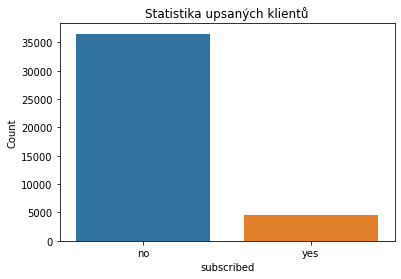

In [70]:
sns.barplot(data=sub, x="subscribed", y="Count").set_title("Statistika upsaných klientů")

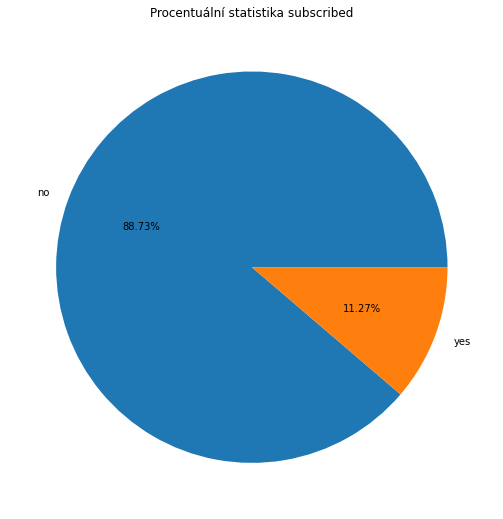

In [71]:
fig = plt.figure(figsize=(12, 9))
plt.pie(data=sub, x="Count", labels="subscribed", autopct='%1.2f%%')
fig.set_facecolor('white')
plt.title("Procentuální statistika subscribed")
plt.show()

- Podle koláčové grafu lze říci, že je 8x větší zastoupení klientů, kteří jsou neupsaní.

# Počty klientů do 30 let, podle toho jestli se upsali.

In [72]:
age30 = df.loc[df.age <= 30]
age30.value_counts("subscribed").reset_index(name="Count")

subscribed  Count
0         no   6259
1        yes   1124

Text(0, 0.5, 'Count')

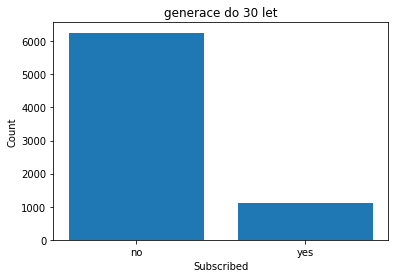

In [73]:
age3 = age30.value_counts("subscribed").reset_index(name="Count")
plt.bar(age3.subscribed, age3.Count)
plt.title("generace do 30 let")
plt.xlabel("Subscribed")
plt.ylabel("Count")


# Počty klientů podle věku

In [74]:
pd.set_option('display.max_rows', None)
print(df.groupby("age").age.count().reset_index(name="Count"))

    age  Count
0    17      5
1    18     28
2    19     42
3    20     65
4    21    102
5    22    137
6    23    226
7    24    463
8    25    598
9    26    698
10   27    851
11   28   1001
12   29   1453
13   30   1714
14   31   1947
15   32   1846
16   33   1833
17   34   1745
18   35   1759
19   36   1780
20   37   1475
21   38   1407
22   39   1432
23   40   1161
24   41   1278
25   42   1142
26   43   1055
27   44   1011
28   45   1103
29   46   1030
30   47    928
31   48    979
32   49    839
33   50    875
34   51    754
35   52    779
36   53    733
37   54    684
38   55    648
39   56    704
40   57    646
41   58    576
42   59    463
43   60    283
44   61     73
45   62     62
46   63     55
47   64     57
48   65     44
49   66     57
50   67     26
51   68     33
52   69     34
53   70     47
54   71     53
55   72     34
56   73     34
57   74     32
58   75     24
59   76     34
60   77     20
61   78     27
62   79     14
63   80     31
64   81     20
65   82   

In [75]:
pd.set_option('display.max_rows', False )

- Největší zastoupení klientů je ve věku od 21 do 45 let, pravděpodobně protože tato skupina nejčastěji potřebuje, nejvíce jim jsou nabízeny nějaké bankovní služby(půjčky, ...)
- Mimo tento rozsah je počet klientů podle věkových kategorií v řádu desítek 

# Vizualice mezi age a subscribed

<AxesSubplot:xlabel='subscribed', ylabel='age'>

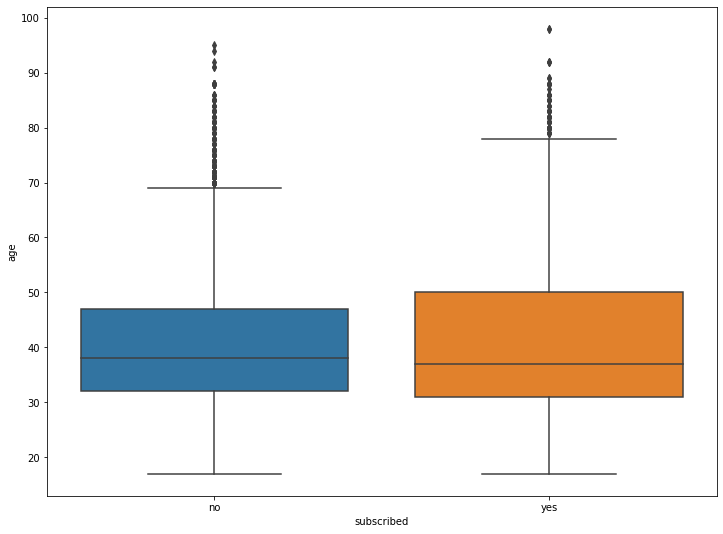

In [76]:
fig = plt.figure(figsize=(12, 9))
sns.boxplot(data = df, y = 'age', x = 'subscribed')


- Jde vidět, že velká skupina upsaných klientů je v rozmezí 35 - 50 let a nejstarší upsaný klient budem mít pravděpodobně kolem 97 let.

In [77]:
df1 = df.loc[(df.subscribed == "yes")]
df1.describe()

age     duration     campaign        pdays     previous  \
count  4640.000000  4640.000000  4640.000000  4640.000000  4640.000000   
mean     40.913147   553.191164     2.051724   792.035560     0.492672   
std      13.837476   401.171871     1.666245   403.407181     0.860344   
min      17.000000    37.000000     1.000000     0.000000     0.000000   
25%      31.000000   253.000000     1.000000   999.000000     0.000000   
50%      37.000000   449.000000     2.000000   999.000000     0.000000   
75%      50.000000   741.250000     2.000000   999.000000     1.000000   
max      98.000000  4199.000000    23.000000   999.000000     6.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx    euribor3m  nr_employed  
count   4640.000000     4640.000000    4640.000000  4640.000000  4640.000000  
mean      -1.233448       93.354386     -39.789784     2.123135  5095.115991  
std        1.623626        0.676644       6.139668     1.742598    87.572641  
min       -3.400000       92.201000     -50.800000     0.634000  4963.600000  
25%       -1.800000       92.893000     -46.200000     0.849000  5017.500000  
50%       -1.800000       93.200000     -40.400000     1.266000  5099.100000  
75%       -0.100000       93.918000     -36.100000     4.406000  5191.000000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

- nejmladšímu klientovi, který se upsal je 17 let a nejstaršímu 98. Průměrný věk upsaného klienta je 40 let.
- Více upsaných klientů je ve vyšším věku.

# Rozdeleni klientu podle jejich job, subscribed.

In [78]:
df_number_of_cat = df.groupby(['job', 'subscribed']).job.count().reset_index(name="Count")
df_number_of_cat

job subscribed  Count
0         admin.         no   9070
1         admin.        yes   1352
2    blue-collar         no   8616
3    blue-collar        yes    638
4   entrepreneur         no   1332
5   entrepreneur        yes    124
6      housemaid         no    954
7      housemaid        yes    106
8     management         no   2596
..           ...        ...    ...
15      services        yes    323
16       student         no    600
17       student        yes    275
18    technician         no   6013
19    technician        yes    730
20    unemployed         no    870
21    unemployed        yes    144
22       unknown         no    293
23       unknown        yes     37

[24 rows x 3 columns]

- Tabulka rozdeluje klienty podle jejich zamestnaci a jestli jsou upsani.
- unknown hodnota zamestnani budou ti, u kterych nebylo zjisteno jejich zamestnani

<AxesSubplot:xlabel='Count', ylabel='job'>

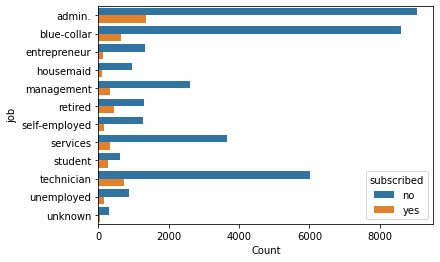

In [79]:
sns.barplot(data=df_number_of_cat, y='job', x='Count', hue='subscribed')

- Jde videt, ze se vetsi mire upisovali klienti s kvalifikovanejsim zamestnanim.

# Je nejaka spojistost education a subscribed?

In [80]:
df_number_of_cat = df.groupby(['education', 'subscribed']).education.count().reset_index(name="Count")
df_number_of_cat

education subscribed  Count
0              basic.4y         no   3748
1              basic.4y        yes    428
2              basic.6y         no   2104
3              basic.6y        yes    188
4              basic.9y         no   5572
5              basic.9y        yes    473
6           high.school         no   8484
7           high.school        yes   1031
8            illiterate         no     14
9            illiterate        yes      4
10  professional.course         no   4648
11  professional.course        yes    595
12    university.degree         no  10498
13    university.degree        yes   1670
14              unknown         no   1480
15              unknown        yes    251

<AxesSubplot:xlabel='Count', ylabel='education'>

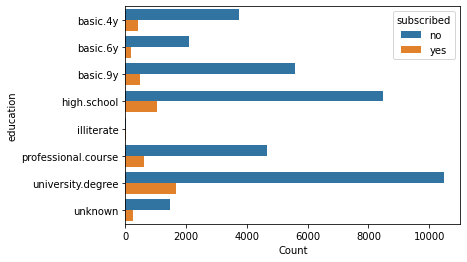

In [81]:
sns.barplot(data=df_number_of_cat, y='education', x='Count', hue='subscribed')

- Klienti s vyšším vzděláním (University degree, high school) se upisovali častěji.

In [83]:
df_number_of_cat = df.groupby(['education','job', 'subscribed']).education.count().reset_index(name="Count")
df_number_of_cat

education           job subscribed  Count
0    basic.4y        admin.         no     67
1    basic.4y        admin.        yes     10
2    basic.4y   blue-collar         no   2195
3    basic.4y   blue-collar        yes    123
4    basic.4y  entrepreneur         no    130
5    basic.4y  entrepreneur        yes      7
6    basic.4y     housemaid         no    423
7    basic.4y     housemaid        yes     51
8    basic.4y    management         no     95
..        ...           ...        ...    ...
168   unknown      services        yes     19
169   unknown       student         no    108
170   unknown       student        yes     59
171   unknown    technician         no    187
172   unknown    technician        yes     25
173   unknown    unemployed         no     14
174   unknown    unemployed        yes      5
175   unknown       unknown         no    114
176   unknown       unknown        yes     17

[177 rows x 4 columns]

# Má vliv typ kontaktu na subscribed?

<Figure size 648x432 with 0 Axes>

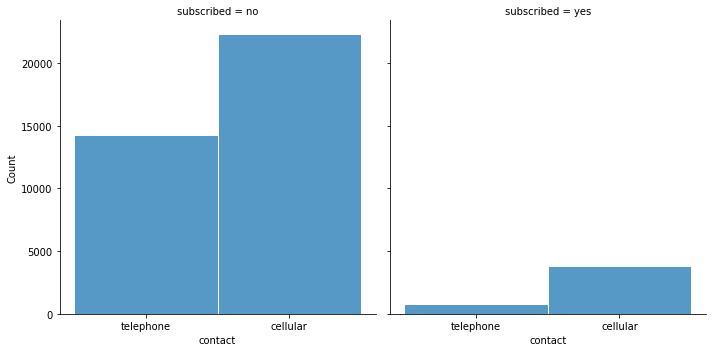

In [84]:
fig = plt.figure(figsize=(9,6))
sns.displot(data = df, x = 'contact', col='subscribed', edgecolor="white")

- Vice klientu se upsalo pres cellular nez telephone

# Věk a úvěr v prodlení

<Figure size 648x432 with 0 Axes>

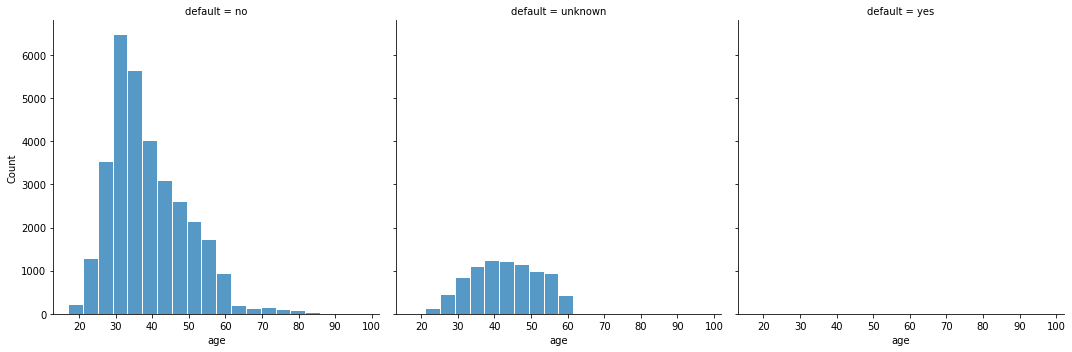

In [85]:
fig = plt.figure(figsize=(9,6))
sns.displot(data = df, x = 'age', bins=20, col='default', edgecolor="white")

- Žádný klient nemá úvěr v prodlení.

# Analýza kategorických dat

In [86]:
df['subscribed'] = df.apply(lambda row: 1 if row["subscribed"] == "yes" else 0, axis=1)

In [87]:
categorial_col = categorial_col.drop("subscribed")

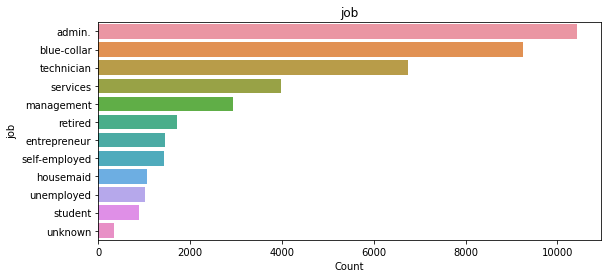

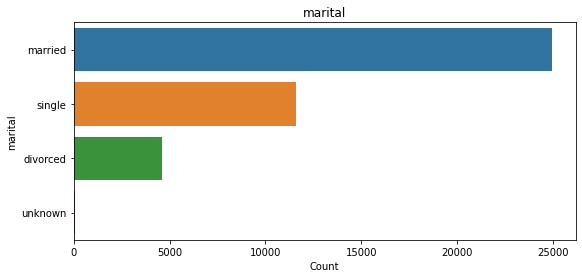

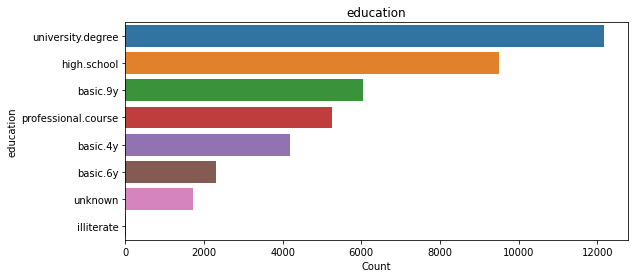

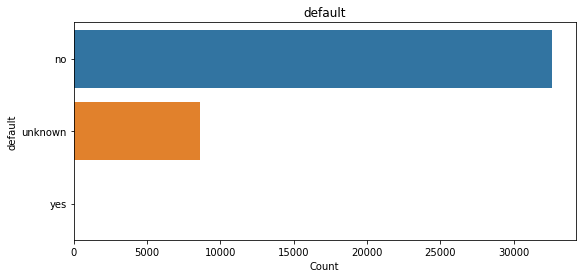

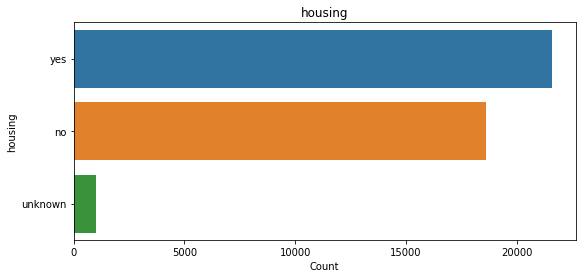

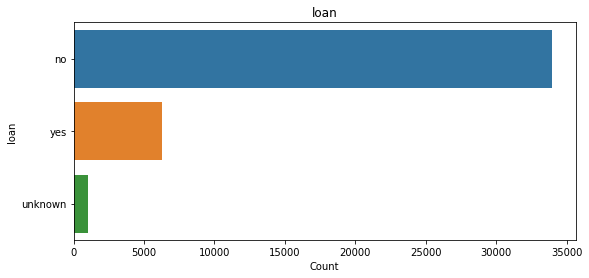

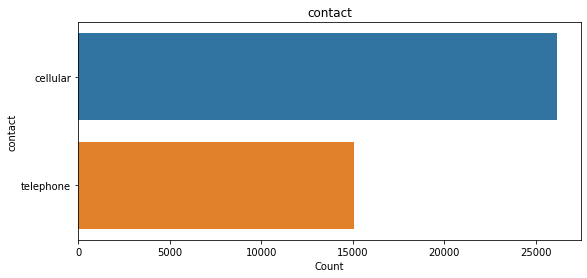

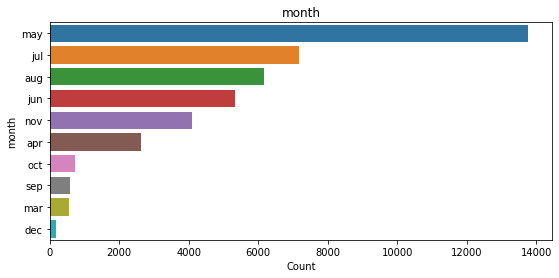

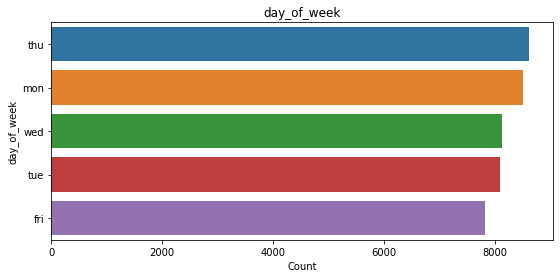

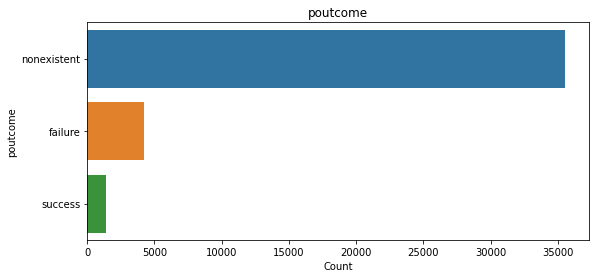

In [88]:
for cat in categorial_col:
    plt.figure(figsize=(9, 4))
    tmp = df.value_counts(cat).reset_index(name="Count")
    sns.barplot(data=tmp, x= 'Count', y= cat).set_title(cat)
    plt.show()


- Největší zastoupení v datech mají klienti se zaměstnáním admin, blue-collar, technician a services
- Nejméně je studentů a unknown.

- Dále převažují klienti kteří jsou ženatí a nejméně je rozvedených.

- Ve vzdělání je nejvíce osob, které mají secondary a tertiary education.

- Žádný klient nemá úvěr v prodlení (default)

- Nejčastějším měsícem, kdy byli lidé kontaktováli je květen.

- Z grafu podle dnů nejsou patrné žádné zajímavé data. Jsou skoro stejné.

- Z většiny nemají klienti žádné osobní půjčky.

- Z velké části klienti ani nebyli v předchozí kampani ani kontaktováni - poutcome == nonexistent, takže v datasetu je velké míře hodně nových klientů


# Subscribed a Kategorické sloupce

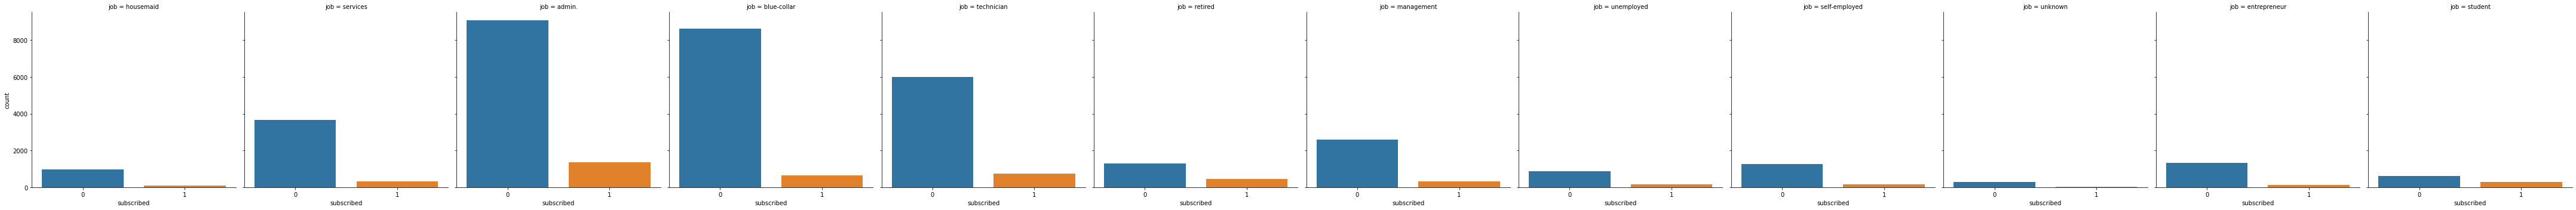

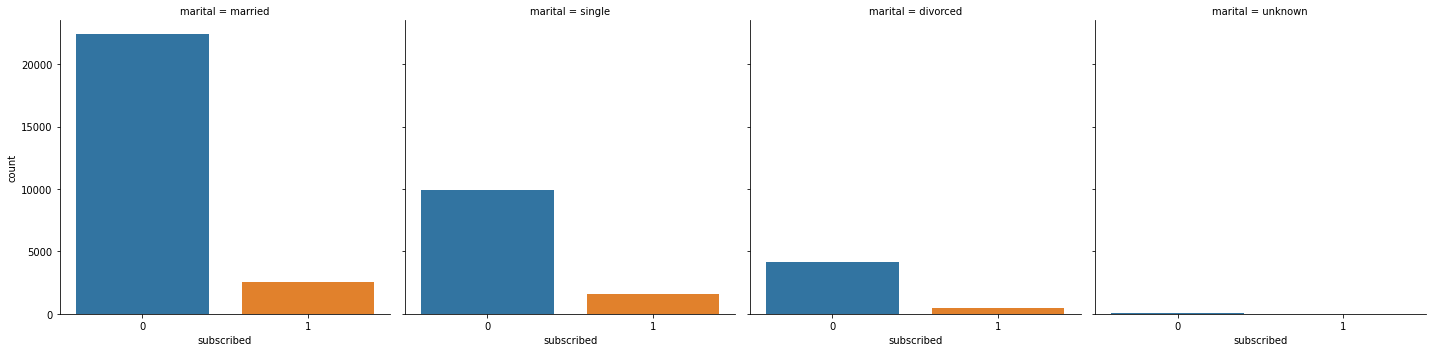

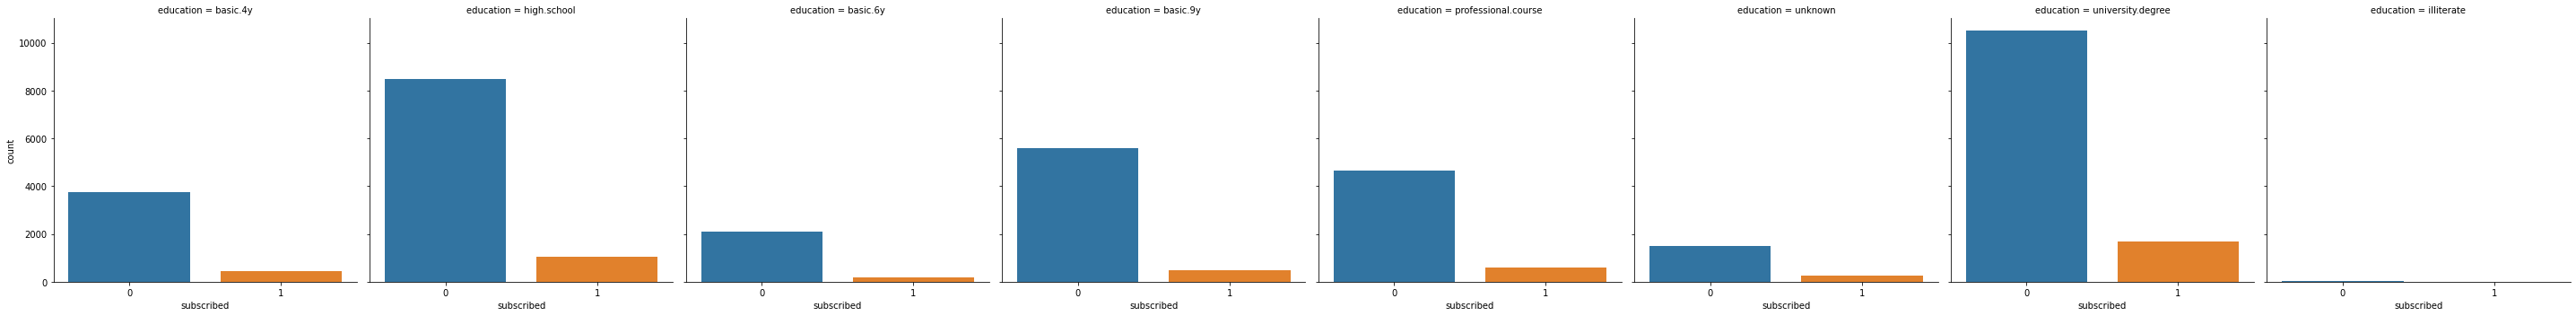

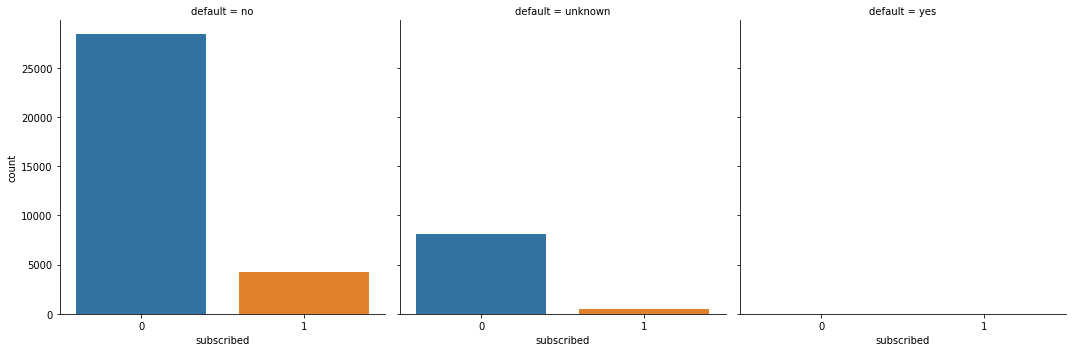

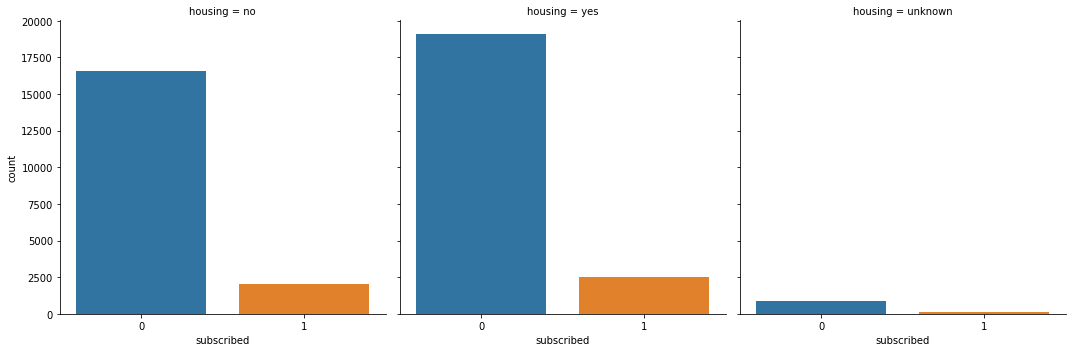

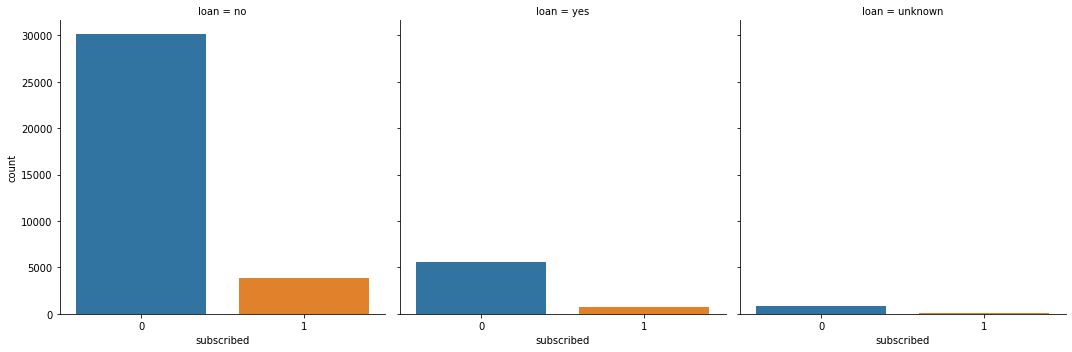

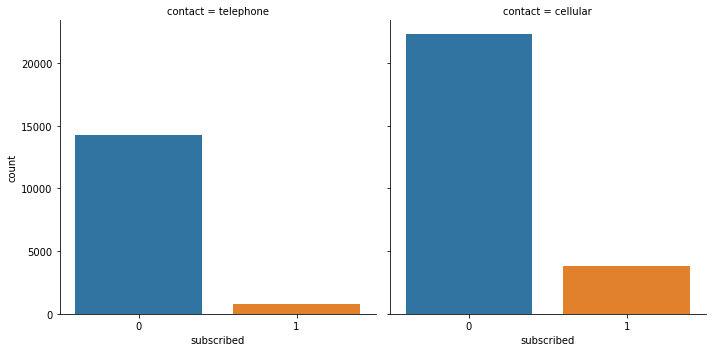

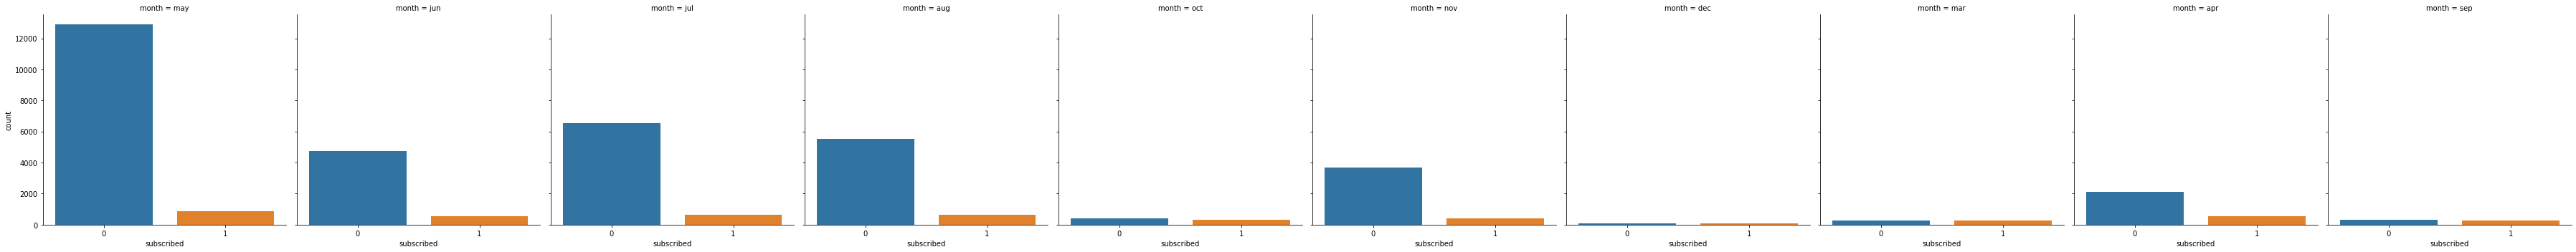

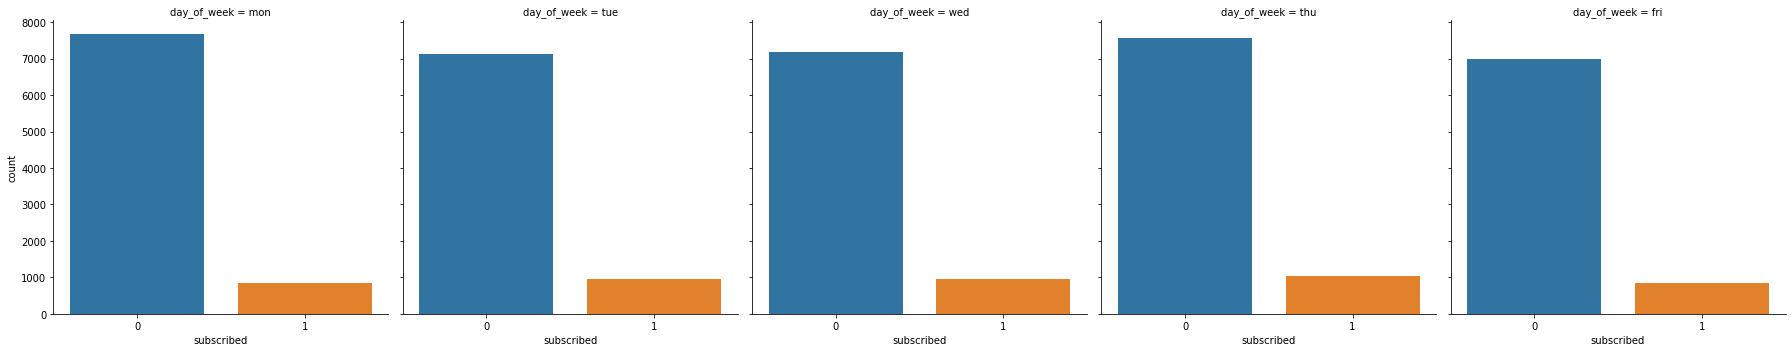

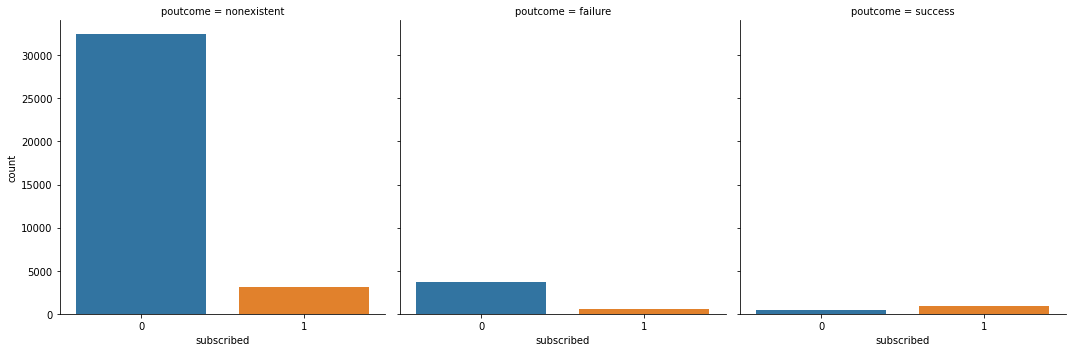

In [89]:
for cat in categorial_col:
    sns.catplot(data=df, x="subscribed", col=cat, kind="count")
    plt.show()

# Počty upsaných/neupsaných podle kategorických dat

In [90]:
for cat in categorial_col:
    print(df.groupby(['subscribed',cat]).size())

subscribed  job          
0           admin.           9070
            blue-collar      8616
            entrepreneur     1332
            housemaid         954
            management       2596
            retired          1286
            self-employed    1272
            services         3646
            student           600
            technician       6013
            unemployed        870
            unknown           293
1           admin.           1352
            blue-collar       638
            entrepreneur      124
            housemaid         106
            management        328
            retired           434
            self-employed     149
            services          323
            student           275
            technician        730
            unemployed        144
            unknown            37
dtype: int64
subscribed  marital 
0           divorced     4136
            married     22396
            single       9948
            unknown        68
1   

# Procento upsání podle kategorických dat

In [91]:
for cat in categorial_col:
    print(cat)
    print(df.groupby(cat).subscribed.mean().multiply(100).reset_index(name="Subscribed[%]"))

job
              job  Subscribed[%]
0          admin.      12.972558
1     blue-collar       6.894316
2    entrepreneur       8.516484
3       housemaid      10.000000
4      management      11.217510
5         retired      25.232558
6   self-employed      10.485574
7        services       8.138070
8         student      31.428571
9      technician      10.826042
10     unemployed      14.201183
11        unknown      11.212121
marital
    marital  Subscribed[%]
0  divorced      10.320902
1   married      10.157253
2    single      14.004149
3   unknown      15.000000
education
             education  Subscribed[%]
0             basic.4y      10.249042
1             basic.6y       8.202443
2             basic.9y       7.824648
3          high.school      10.835523
4           illiterate      22.222222
5  professional.course      11.348465
6    university.degree      13.724523
7              unknown      14.500289
default
   default  Subscribed[%]
0       no      12.878974
1  unknown  

- V květnu byli klienti nejčasteji kontaktováni, ale nejméně se jich upsalo.
- Nejvíce se jich upsalo v March a December.
- blue-collar, services, entrepreneur má nejnižší počet upsaných klientů.
- illiterate, studenti a retired mají nejvyšší procento upsání.  
- Klienti s půjčkou na dům neměli zájem o upsání.
- Klienti, kteří měli u předchozí kampaně úspěch, tak se často upisovali. 


# Korelace mezi ciselnymi sloupci

<AxesSubplot:>

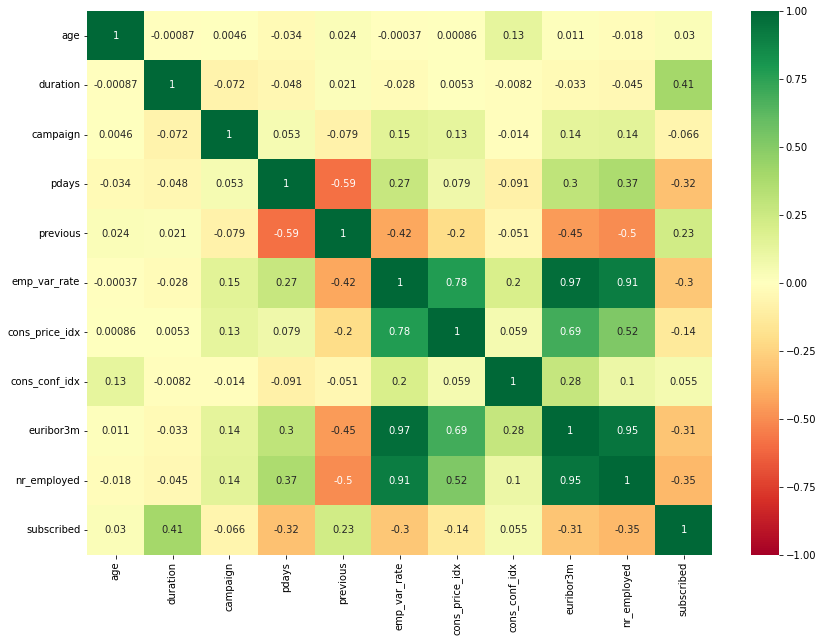

In [92]:
cor_mat=df.corr()
fig = plt.figure(figsize=(14,10))
sns.heatmap(cor_mat,annot=True, cmap='RdYlGn', vmin=-1,vmax=1)

korelace mezi:
- euribor3m, emp_var_rate
- nr_employed, euribor3m
- nr_employed, emp_var_rate

In [93]:
economic_idx = ["euribor3m","cons_price_idx", "cons_conf_idx", "emp_var_rate", "subscribed", "nr_employed"]
df[economic_idx].corr()

euribor3m  cons_price_idx  cons_conf_idx  emp_var_rate  \
euribor3m        1.000000        0.688230       0.277686      0.972245   
cons_price_idx   0.688230        1.000000       0.058986      0.775334   
cons_conf_idx    0.277686        0.058986       1.000000      0.196041   
emp_var_rate     0.972245        0.775334       0.196041      1.000000   
subscribed      -0.307771       -0.136211       0.054878     -0.298334   
nr_employed      0.945154        0.522034       0.100513      0.906970   

                subscribed  nr_employed  
euribor3m        -0.307771     0.945154  
cons_price_idx   -0.136211     0.522034  
cons_conf_idx     0.054878     0.100513  
emp_var_rate     -0.298334     0.906970  
subscribed        1.000000    -0.354678  
nr_employed      -0.354678     1.000000

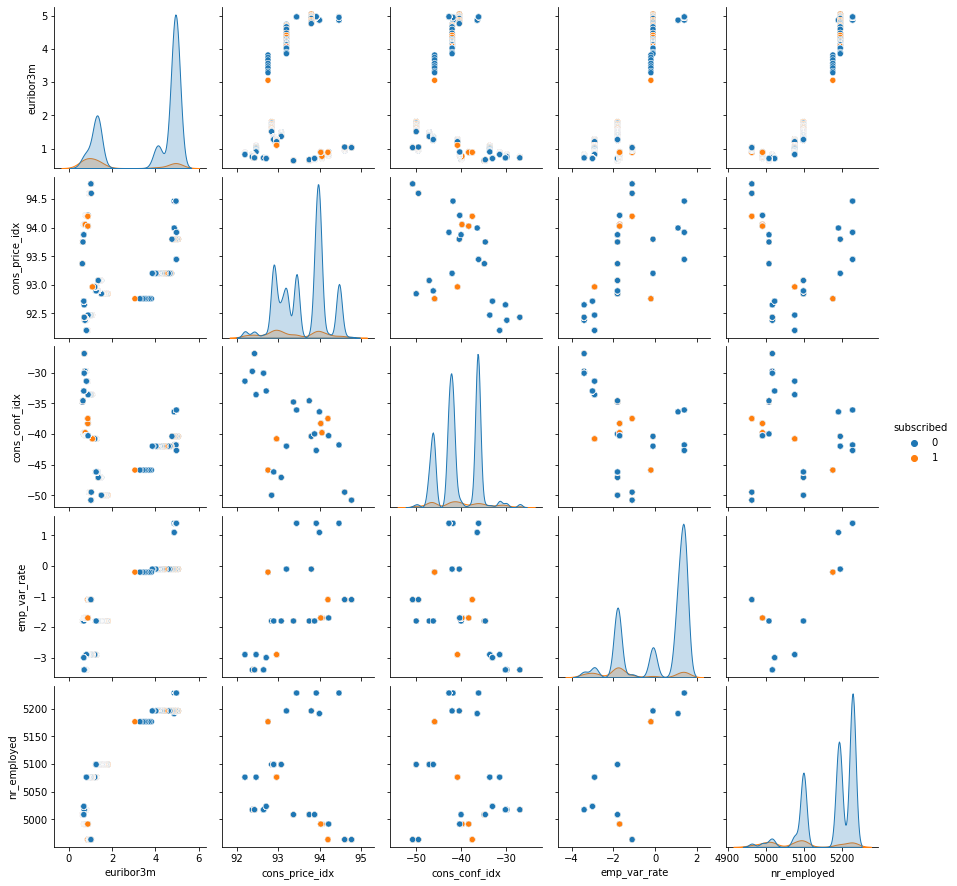

In [39]:
sns.pairplot(df[economic_idx], hue="subscribed")
plt.show()

- euribor3m roste, kdyz emp_var_rate taky a  tim padem mene lidi se upisuji.


# Ciselne sloupce

In [94]:
num_col = df.select_dtypes(include=np.number).columns
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'subscribed'],
      dtype='object')

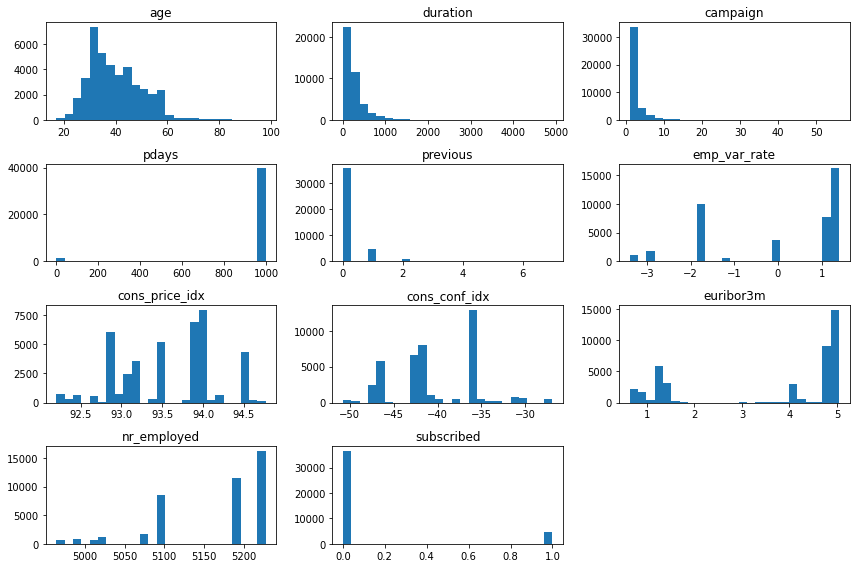

In [95]:
df[num_col].hist(figsize=(12,8),bins=25, grid=False)
plt.tight_layout()

In [96]:
num_col = num_col.drop("subscribed")
num_col = num_col.drop(["euribor3m","cons_price_idx", "cons_conf_idx", "emp_var_rate","nr_employed"])

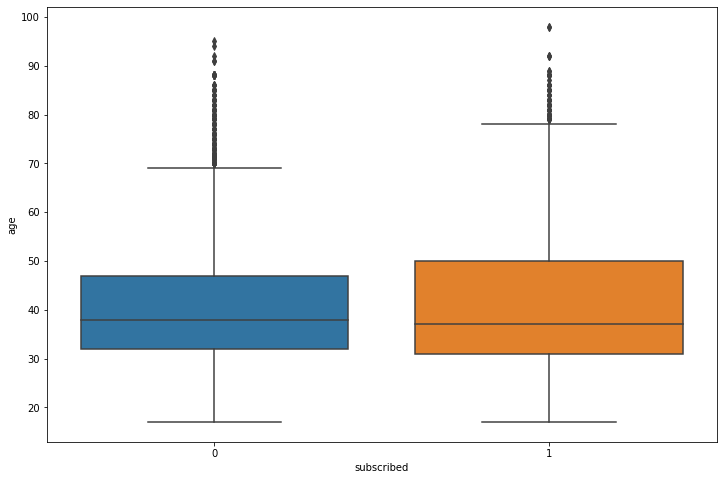

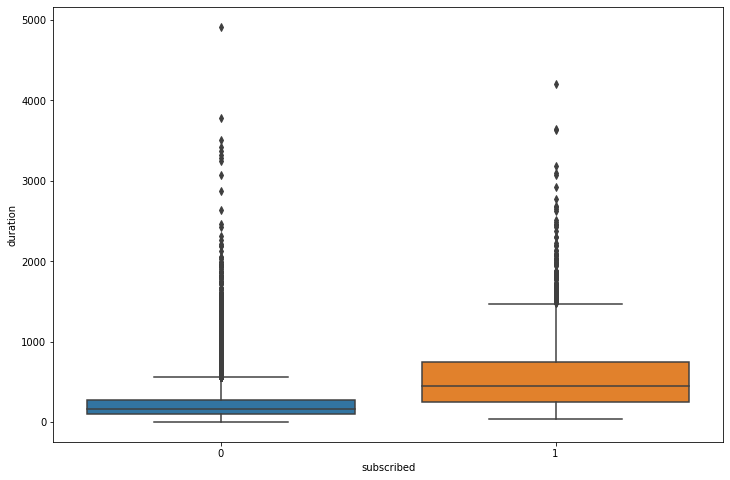

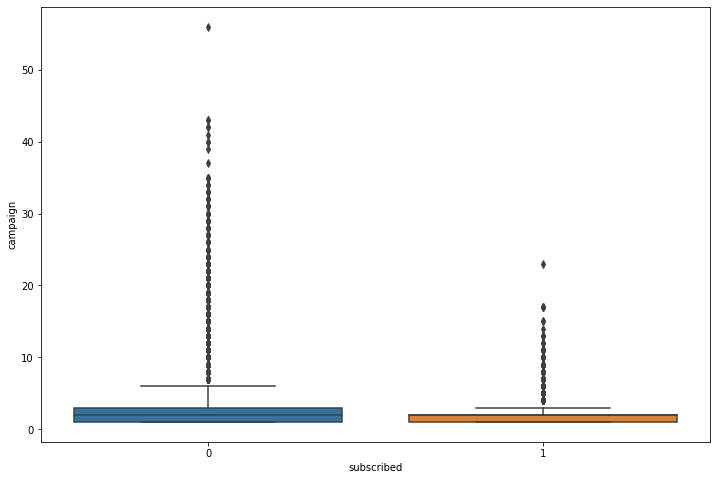

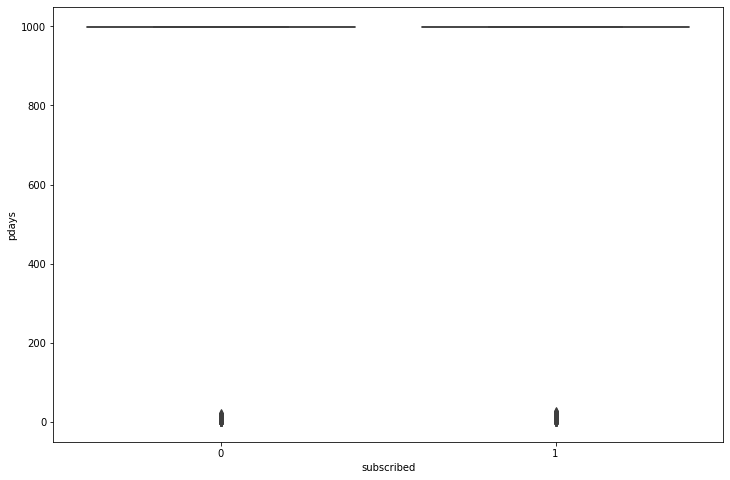

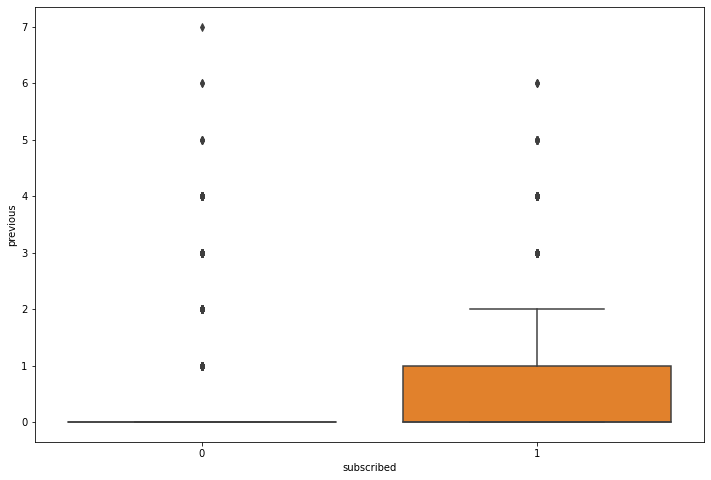

In [97]:
for col in num_col:
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x="subscribed", y=df[col])
    plt.show()

- Klienti, kteří mají delší dobu komunikace (duration) se ve větší míře upisovali.
- Taky hodně klientů, kteří už v minulosti měli kontakt s bankou, tak častěji upsali.

# Pdays

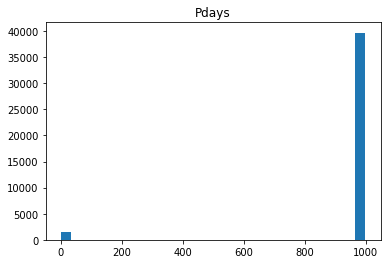

In [98]:
plt.hist(df.pdays, bins=30)
plt.title("Pdays")
plt.show()

In [99]:
print(df.groupby("pdays").size())

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
       ...  
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Length: 27, dtype: int64


- většina klientů má nastavenou hodnotu pro pdays na 999, což pravděpodobně bude hodnota pro ty kteří ještě nikdy nebyli kontaktováni.

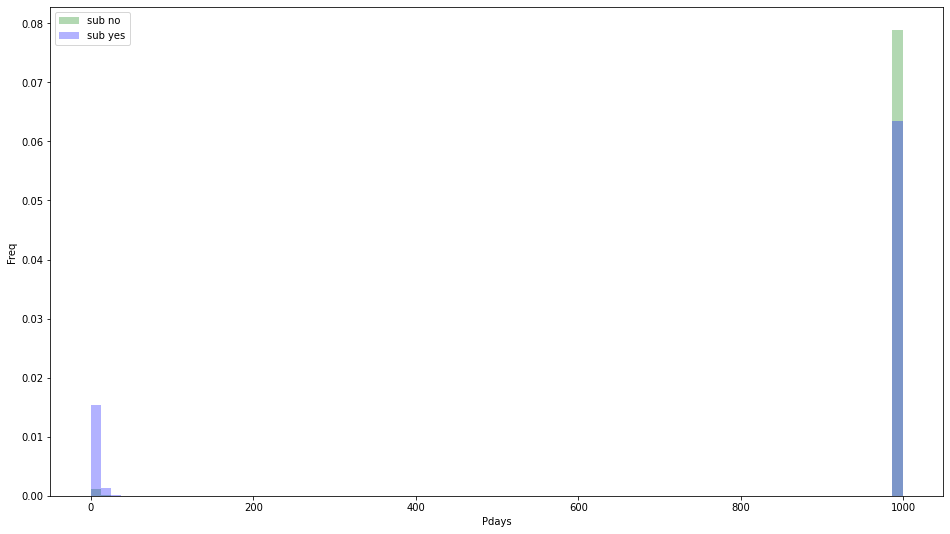

In [100]:
pdays_yes = df[df.subscribed == 1].iloc[:,12:13]
pdays_no = df[df.subscribed == 0].iloc[:,12:13]

pdays_yes = np.array(pdays_yes)
pdays_no = np.array(pdays_no)

plt.figure(figsize=(16,9))
plt.hist(pdays_no, density=True, bins=80, color="g",alpha=0.3, label="sub no")
plt.hist(pdays_yes,density=True, bins=80,color="b",alpha=0.3, label="sub yes")
plt.legend(loc='upper left')
plt.xlabel("Pdays")
plt.ylabel("Freq")
plt.show()

# Age a Subscribed

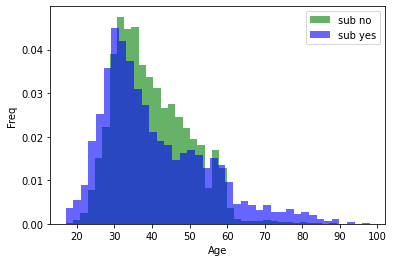

In [101]:
age_yes = df[df.subscribed == 1].iloc[:,:1]
age_no = df[df.subscribed == 0].iloc[:,:1]

age_yes = np.array(age_yes)
age_no = np.array(age_no)

plt.hist(age_no, density=True, bins=40, color="g",alpha=0.6, label="sub no")
plt.hist(age_yes,density=True, bins=40,color="b",alpha=0.6, label="sub yes")
plt.legend(loc='upper right')
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

- Největší zastoupení klientů, kteří jsou upsaní je ve věkové kategorii do 30 let a ve skupině 60+ let.
- Největší zastoupení neupsaných klientů je v rozmezí 30 - 60 let.

# Procento upsání podle generací
- Senior > 60
- 30 < Adult <= 60
- Young < 30

Text(0.5, 1.0, 'Subscribe rate by generations')

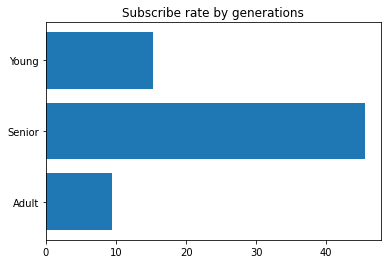

In [102]:
df.loc[:, "generation"] = "Senior"
df.loc[(df.age <= 30),"generation"] = "Young"
df.loc[(df.age > 30) & (df.age <= 60),"generation"] = "Adult"

g = df.groupby("generation").subscribed.mean().multiply(100).reset_index(name="Mean")

plt.barh(g.generation,g.Mean)
plt.title("Subscribe rate by generations")


- přes 40% lidí staršího věku se upsalo.

# Závěr
- V datasetu se nachází hodně nových klientů, kteří nebyli v minulých kampaních kontaktování.
- Není žádný klient, který by měl úvěr v prodlení.
- Nejvíce se v objevují klienti s vyšším vzděláním, kvalifikovanějším zaměstnáním.
- Taky jde z dat určit, že pokud klient už byl v předchozí kampani a byl v ní úspěšný, tak se upsal i v nové.
- illiterate, studenti a retired mají nejvyšší procento upsání.  
- Marital nemá žádný vliv na to jestli jsou klienti upsaní. Nejméně upsaných je mezi rozvedenými.
- V květnu byli klienti nejčasteji kontaktováni, ale nejméně se jich upsal a nejvíce se upsalo v March, December.
- Nejméně upsaných klientů patří mezi blue-collar, services, entrepreneur.
- Klienti s půjčkou na dům neměli zájem o upsání.
- Největší zastoupení klientů, kteří jsou upsaní je ve věkové kategorii do 30 let a ve skupině 60+ let.
- Největší zastoupení neupsaných klientů je v rozmezí 30 - 60 let.



